In [155]:
"""Data Clensing"""
import csv
with open('chk_FinancialDiaries_week1-2.csv', encoding='cp1252') as var_name:
    reader=csv.reader(var_name)
    A = [row for row in reader]
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import cm
pd.set_option('display.max_columns', None)
df= pd.DataFrame(A)
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header 
df["TypeER"]=df["TypeER"].astype(str)
df["CODE"]=df["CODE"].astype(str)
df["ER_CODE"]=df["TypeER"]+df["CODE"] 
df["ER_CODE"]=df["ER_CODE"].astype(int)
df['Diarist_ID']=df['Diarist_ID'].astype(int)
df['FINANCIAL_DATE']=pd.to_datetime(df.FINANCIAL_DATE)
df['TypeER']=df['TypeER'].astype(int)
df['CODE']=df['CODE'].astype(int)
df['Calculate']=pd.to_numeric(df["Calculate"])

Code={11:'Food',12:"Housing",13:"Medical Service",14:"Education",15:"Alcohol",
            16:"Seeds",17:"Energy",18:"Cleaning materials",19:"Transportation",110:"Clothing",
            111:"Debt/Loan payments",112:"Pre-paid phone/Internet",113:"Ceremony",114:"Others",
          21:'Regular wage',22:"Casual employment",23:"Agricultural",24:"Livestockselling, fishery",25:"Self-owned business",
            26:"Property rental income",27:"Remittances",28:"Gifts, Grants",29:"Lending",210:"Others"} 
            #Codes start from 1 is expense, 2 is income.
#Code_Khmer={1:'អាហារ',2:"លំនៅដ្ឋាន",3:u"សេវាវេជ្ជសាស្រ្ត",4:u"ការអប់រំ",5:"ជាតិអាល់កុល",
#            6:"គ្រាប់ពូជ",7:"ថាមពល",8:u"សម្ភារៈសំអាត",9:"ការដឹកជញ្ជូន",10:"សម្លៀកបំពាក់",
#            11:"ការទូទាត់បំណុល / ប្រាក់កម្ចី",12:"សេវាអ៊ីនធឺណិត",13:"ពិធី",14:"ផ្សេងទៀត។"}
Code_Color={11:'brown',12:'olive',13:"red",14:"navy",15:"blueviolet",16:"seagreen",17:"goldenrod",18:"azure",19:"dodgerblue",110:"Black",
            111:"pink",112:"darkcyan",113:"orange",114:"palegreen",21:"khaki",22:"tomato", 23:"peru",24:"linen",25:"lightblue",
            26:"blue",27:"indigo",28:"slategrey",29:"plum",210:"salmon"}

df["CODE_K"]=df["ER_CODE"].map(Code)
df.head()

,Diarist_ID,TypeER,BranchName,BranchID,Province,District,Commune,Village,VID,Sample_Type1,Sample_Type2,L_number,L_Status,Impact,ENUMERATOR_CODE,ENUMERATOR_NAME,RESPONDENT_CODE,RESPONDENT_NAME,INTERVIEW_DATE,FINANCIAL_DATE,INTERVIEW_METHOD,TOTAL,ID,Description_EN,AMOUNT,CURRENCY,RDInstitution_EN,CODE,description,Calculate,BUSINESS_INFO_EN,HEALHT_INFO_EN,EDUCATION_INFO_EN,OTHER_INFO_EN,DATA_COLLECTOR_NOTE_EN,ER_CODE,CODE_K
1,5,1,BTM,1,Kampot,Dang Tong,Totung,Phnum Touch,1,1,1,1,2,1,210182,Chim Somphors,5,Koam Saun,10/13/2021,2021-10-12,1,7.875,2,Foods and Vigetable,10000,1,store in the village,1,"Food (rice, fish, beef, ingredients, etc.)",2.500,-98,-98,-98,-98,No,11,Food
2,5,1,BTM,1,Kampot,Dang Tong,Totung,Phnum Touch,1,1,1,1,2,1,210182,Chim Somphors,5,Koam Saun,10/13/2021,2021-10-12,1,7.875,4,Drink and Cakes,10000,1,store in the village,5,"Alcohol (wine, beer, etc.), Cigarette, enterta...",2.500,-98,-98,-98,-98,No,15,Alcohol
3,5,1,BTM,1,Kampot,Dang Tong,Totung,Phnum Touch,1,1,1,1,2,1,210182,Chim Somphors,5,Koam Saun,10/13/2021,2021-10-12,1,7.875,1,Buy Chichen feed,5000,1,store in the village,14,Others,1.250,-98,-98,-98,-98,No,114,Others
4,5,1,BTM,1,Kampot,Dang Tong,Totung,Phnum Touch,1,1,1,1,2,1,210182,Chim Somphors,5,Koam Saun,10/13/2021,2021-10-12,1,7.875,3,Phone Card,4500,1,store in the village,12,"Pre-paid phone cards, internet services",1.125,-98,-98,-98,-98,No,112,Pre-paid phone/Internet
5,5,1,BTM,1,Kampot,Dang Tong,Totung,Phnum Touch,1,1,1,1,2,1,210182,Chim Somphors,5,Koam Saun,10/13/2021,2021-10-12,1,7.875,5,Give money to grandchildren go to school,2000,1,at school,4,"Education (school fee, books, uniform, other m...",0.500,-98,-98,-98,-98,No,14,Education


/Users/inouenoritake/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


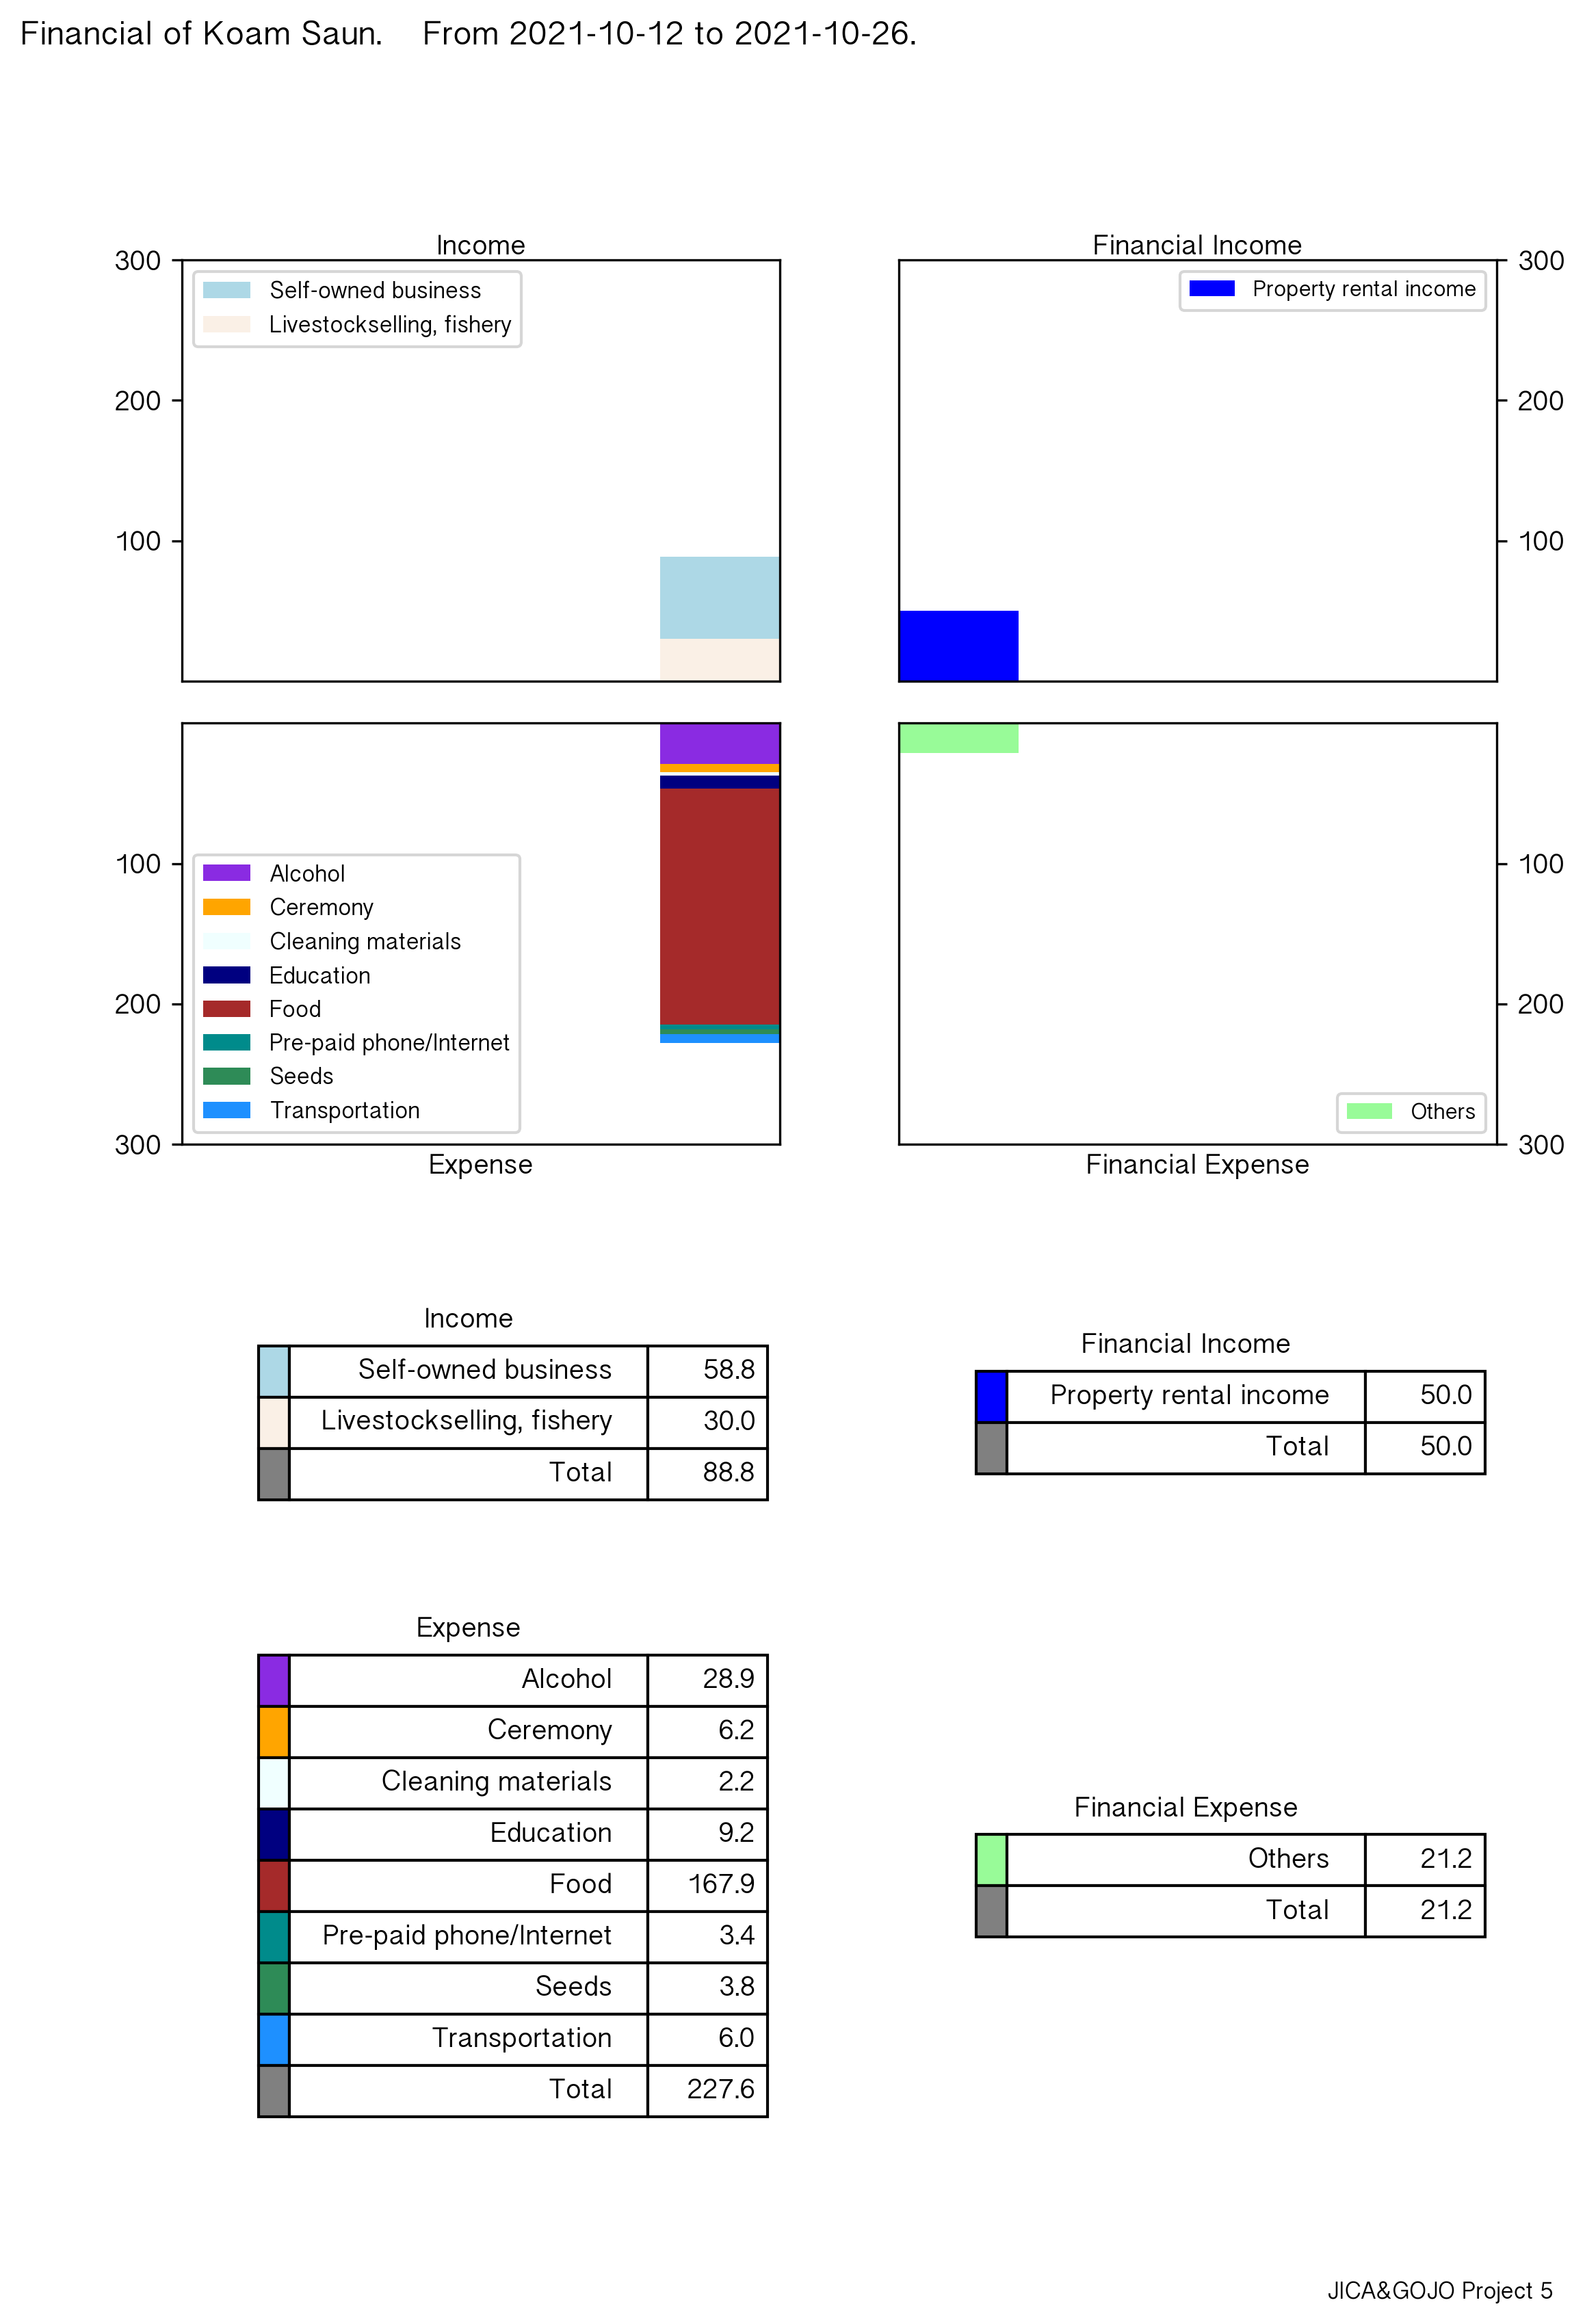

In [197]:
"""This code is for when you make a report for each person"""

"""Set the ID&Name and date for the report"""
dfID=5
df_ID=df.drop(df[(df.Diarist_ID!= dfID)].index)
Sday='2021-10-12'
Eday='2021-10-26'
Start_day=pd.to_datetime(Sday)
End_day=pd.to_datetime(Eday)
mask=(df_ID['FINANCIAL_DATE']>=Start_day)&(df_ID['FINANCIAL_DATE']<=End_day)
df_IDay = df_ID.loc[mask]  #drop the rows outside of mask dates range

"""Make the dataframes for Out, In, Financial Out, and Financial In using ER_CODE"""
Out_list=[11, 12, 13, 14, 15, 16, 17, 18, 19, 110, 112, 113]
In_list=[21,22,23,24,25]
F_in_list=[26,27,28,29,210]
F_out_list=[111,114]
Out=df_IDay[df_IDay.ER_CODE.isin(Out_list)]
In=df_IDay[df_IDay.ER_CODE.isin(In_list)]
F_out=df_IDay[df_IDay.ER_CODE.isin(F_out_list)]
F_in=df_IDay[df_IDay.ER_CODE.isin(F_in_list)]



"""Setting for graph: font, font size, figure size, figure ratio"""
%matplotlib inline
plt.rcParams["font.family"] = 'Khmer Sangam MN' #Setting Khmer font
title_fontsize = 'small'
fig = plt.figure(dpi=300, tight_layout=True)
fig.set_size_inches(8.27, 11.69, forward=True)

"""Greetings"""
description='Financial of %s.    From %s to %s.'%(df_ID["RESPONDENT_NAME"].unique()[0],Sday,Eday)
Ending="JICA&GOJO Project %s"%(dfID)

plt.figtext(0.03, .97, description, fontsize = 12)
plt.figtext(0.8, 0.03, Ending, fontsize = 'small')

"""Setting figures"""
ax = np.zeros(8, dtype=object)
gs = fig.add_gridspec(4, 2, height_ratios=[1,1,1,1],hspace=0.1,wspace=0.2)
ax[0] = fig.add_subplot(gs[0, 0])
ax[1] = fig.add_subplot(gs[0, 1])
ax[2] = fig.add_subplot(gs[1, 0])
ax[3] = fig.add_subplot(gs[1, 1])
ax[4] = fig.add_subplot(gs[2, 0])
ax[5] = fig.add_subplot(gs[2, 1])
ax[6] = fig.add_subplot(gs[3, 0])
ax[7] = fig.add_subplot(gs[3, 1])

"""Set dynamic tick"""
Calculate_sum=max(In['Calculate'].sum(),Out['Calculate'].sum(),
                  F_in['Calculate'].sum(),F_out['Calculate'].sum())*1.1
fd=int(str(Calculate_sum)[:1])      #first digit
d=len(str(int(Calculate_sum)))-1    #How many digits
Calculate_sum_r=(fd+1)*(10**d)
graduations=[]
for i in range(1,fd+2):
    graduations.append((Calculate_sum_r/(fd+1)*i)) 
    

"""Bar graphs""" 
"""Income"""  #I will explain only the bar graph of Income in detail. 
              #The other 3 graphs are the same in structure.
axi=ax[0]
plt.sca(axi) 
try: #Set try and except in the case when there is no income.   
    pivot=In.pivot_table(columns = 'CODE_K' , values = 'Calculate',aggfunc=np.sum)
    pivot=pivot.transpose()        #Creating the pivot table for Income.
    Total=pivot['Calculate'].sum()
    
    def set_labels(ax):  #Set label function
        axi.set_title("Income", fontsize = 10,pad=0.1)
        
    for i in range(len(pivot)): 
        c=pivot.index[i]
        key = [k for k, v in Code.items() if v == c][0]  #Retrieve the Code(key) from Code_K(Description) 
        axi.bar(pivot.columns, pivot.iloc[i],bottom=pivot.iloc[:i].sum(),
                    width=0.5,align='edge',label=pivot.index[i],color=Code_Color[key])
    """Axis design"""
    axi.set_xlim(-0.8, 0.2)
    axi.xaxis.set_visible(False)
    axi.set_yticks(graduations)
    handles, labels = axi.get_legend_handles_labels()
    axi.legend(handles[::-1], labels[::-1],loc=2,bbox_to_anchor=(0, 1),fontsize=title_fontsize)
    set_labels(axi)
except Exception:
    pass

"""Financial Income"""
axfi=ax[1]
plt.sca(axfi) 
try:    
    pivot=F_in.pivot_table(columns = 'CODE_K' , values = 'Calculate',aggfunc=np.sum)
    pivot=pivot.transpose()
    Total=pivot['Calculate'].sum()    
    def set_labels(ax):
        ax.set_title("Financial Income", fontsize = 10,pad=0.1)
    for i in range(len(pivot)): 
        c=pivot.index[i]
        key = [k for k, v in Code.items() if v == c][0]
        axfi.bar(pivot.columns, pivot.iloc[i],bottom=pivot.iloc[:i].sum(),
                    width=0.2,align='edge',label=pivot.index[i],color=Code_Color[key])
    axfi.set_xlim(0, 1) 
    axfi.set_yticks(graduations)
    axfi.yaxis.tick_right()
    axfi.xaxis.set_visible(False)
    handles, labels = axfi.get_legend_handles_labels()
    axfi.legend(handles[::-1], labels[::-1],loc='upper right',bbox_to_anchor=(1, 1),fontsize=8)
    set_labels(axfi)
except Exception:
    pass


"""Expense"""
axe=ax[2]
plt.sca(axe) 
try:
    pivot=Out.pivot_table(columns = 'CODE_K' , values = 'Calculate',aggfunc=np.sum)
    pivot=pivot.transpose()
    Total=pivot['Calculate'].sum()    
    def set_labels(ax):
        ax.set_title("Expense", fontsize = 10,pad=0.1,y=-0.07)
    for i in range(len(pivot)): 
        c=pivot.index[i]
        key = [k for k, v in Code.items() if v == c][0]
        axe.bar(pivot.columns, pivot.iloc[i],bottom=pivot.iloc[:i].sum(),
                    width=0.5,align='edge',label=pivot.index[i],color=Code_Color[key])
    axe.set_xlim(-0.8, 0.2) 
    axe.xaxis.set_visible(False)
    axe.set_yticks(graduations)
    handles, labels = axe.get_legend_handles_labels()
    axe.legend(handles[::], labels[::],loc="lower left",bbox_to_anchor=(0, 0),fontsize=title_fontsize)
    axe.invert_yaxis()
    set_labels(axe)
except Exception:
    pass

"""Financial Expense"""
axfe=ax[3]
plt.sca(axfe) 
try:    
    pivot=F_out.pivot_table(columns = 'CODE_K' , values = 'Calculate',aggfunc=np.sum)
    pivot=pivot.transpose()
    Total=pivot['Calculate'].sum()    
    def set_labels(ax):
        ax.set_title("Financial Expense", fontsize = 10,pad=0.1,y=-0.07)
    for i in range(len(pivot)): 
        c=pivot.index[i]
        key = [k for k, v in Code.items() if v == c][0]
        axfe.bar(pivot.columns, pivot.iloc[i],bottom=pivot.iloc[:i].sum(),
                    width=0.2,align='edge',label=pivot.index[i],color=Code_Color[key])
    axfe.set_xlim(0, 1)
    axfe.xaxis.set_visible(False)
    axfe.set_yticks(graduations)
    axfe.yaxis.tick_right()
    handles, labels = axfe.get_legend_handles_labels()
    axfe.legend(handles[::], labels[::],loc='lower right',bbox_to_anchor=(1, 0),fontsize=8)
    axfe.invert_yaxis()
    set_labels(axfe)
except Exception:
    pass

"""Table""" 
"""Income"""  #I will explain only the Table of Income in detail. 
              #The other 3 graphs are the same in structure.
axis=ax[4]
plt.sca(axis) 
pivot=In.pivot_table(columns = 'CODE_K' , values = 'Calculate',aggfunc=np.sum)
pivot=pivot.transpose()
Total=pivot['Calculate'].sum() 
colors=[] 
white=[]
for i in range(len(pivot)): #Creating colors
        c=pivot.index[i]
        key = [k for k, v in Code.items() if v == c][0]
        colors.append(Code_Color[key])
        white.append("w")
try:
    labels=pivot.index.tolist()
    column_labels=[" "*2]*len(pivot['Calculate'].tolist())
    data=[]
    for i in range(len(pivot['Calculate'].tolist())):
        data.append([labels[i],round(pivot['Calculate'].tolist()[i],1)])
    data.reverse()
    colors.reverse()
    data.append(["Total",round(sum(pivot['Calculate'].tolist()),1)])
    column_labels.append(" "*3)
    colors.append("grey") 
    table=axis.table(cellText=data,rowLabels=column_labels,
                        loc="center right",fontsize=80,rowColours=colors,  #Put a color in the column
                     colWidths=[0.6,0.2],colLabels=["Income",""])
    table.auto_set_font_size(False)
    axis.axis('off')
    table.scale(1,1.5)
    table[(0, 0)].set_edgecolor("w")
    table[(0, 1)].set_edgecolor("w")
except Exception:
    print("error")
    
"""Financial Income"""
axis=ax[5]
plt.sca(axis) 
pivot=F_in.pivot_table(columns = 'CODE_K' , values = 'Calculate',aggfunc=np.sum)
pivot=pivot.transpose()
Total=pivot['Calculate'].sum() 
colors=[] #Creating colors
white=[]
for i in range(len(pivot)): 
        c=pivot.index[i]
        key = [k for k, v in Code.items() if v == c][0]
        colors.append(Code_Color[key])
        white.append("w")
try:
    labels=pivot.index.tolist()
    column_labels=[" "*2]*len(pivot['Calculate'].tolist())
    data=[]
    for i in range(len(pivot['Calculate'].tolist())):
        data.append([labels[i],round(pivot['Calculate'].tolist()[i],1)])
    data.reverse()
    colors.reverse()
    data.append(["Total",round(sum(pivot['Calculate'].tolist()),1)])
    column_labels.append(" "*3)


    colors.append("grey")
    table=axis.table(cellText=data,rowLabels=column_labels,
                        loc="center right",fontsize=80,rowColours=colors,
                     colWidths=[0.6,0.2],colLabels=["Financial Income",""])
    table.auto_set_font_size(False)    
    axis.axis('off')
    table.scale(1,1.5)
    table[(0, 0)].set_edgecolor("w")
    table[(0, 1)].set_edgecolor("w")
except Exception:
    print("error") 
    
"""Expense"""
axis=ax[6]
plt.sca(axis) 
pivot=Out.pivot_table(columns = 'CODE_K' , values = 'Calculate',aggfunc=np.sum)
pivot=pivot.transpose()
Total=pivot['Calculate'].sum() 
colors=[] #Creating colors
white=[]
for i in range(len(pivot)): 
        c=pivot.index[i]
        key = [k for k, v in Code.items() if v == c][0]
        colors.append(Code_Color[key])
        white.append("w")
try:
    labels=pivot.index.tolist()
    column_labels=[" "*3]*len(pivot['Calculate'].tolist())
    data=[]
    for i in range(len(pivot['Calculate'].tolist())):
        data.append([labels[i],round(pivot['Calculate'].tolist()[i],1)])
    #data.reverse()
    #colors.reverse()
    data.append(["Total",round(sum(pivot['Calculate'].tolist()),1)])
    column_labels.append(" "*3)


    colors.append("grey")
    table=axis.table(cellText=data,rowLabels=column_labels,
                        loc="center right",fontsize=80,rowColours=colors,
                     colWidths=[0.6,0.2],colLabels=["Expense",""])
    table.auto_set_font_size(False)
    axis.axis('off')
    table.scale(1,1.5)
    table[(0, 0)].set_edgecolor("w")
    table[(0, 1)].set_edgecolor("w")
except Exception:
    print("error")

"""Financial Expense"""
axis=ax[7]
plt.sca(axis) 
pivot=F_out.pivot_table(columns = 'CODE_K' , values = 'Calculate',aggfunc=np.sum)
pivot=pivot.transpose()
Total=pivot['Calculate'].sum() 
colors=[] #Creating colors
white=[]
for i in range(len(pivot)): 
        c=pivot.index[i]
        key = [k for k, v in Code.items() if v == c][0]
        colors.append(Code_Color[key])
        white.append("w")
try:
    labels=pivot.index.tolist()
    column_labels=[" "*3]*len(pivot['Calculate'].tolist())
    data=[]
    for i in range(len(pivot['Calculate'].tolist())):
        data.append([labels[i],round(pivot['Calculate'].tolist()[i],1)])
    #data.reverse()
    #colors.reverse()
    data.append(["Total",round(sum(pivot['Calculate'].tolist()),1)])
    column_labels.append(" "*3)


    colors.append("grey")
    table=axis.table(cellText=data,rowLabels=column_labels,colLabels=["Financial Expense",""],
                        loc="center right",fontsize=80,rowColours=colors,colWidths=[0.6,0.2])
    table.auto_set_font_size(False)
    axis.axis('off')
    table.scale(1,1.5)
    table[(0, 0)].set_edgecolor("w")
    table[(0, 1)].set_edgecolor("w")
except Exception:
    print("error")
    
#plt.savefig('test_#480_k.pdf')

In [ ]:
#End

In [198]:


DF=[In,Out,F_in,F_out]
for i in DF:
    i.drop(F_out.columns.difference(
        ['FINANCIAL_DATE','CODE_K','Description_EN','RDInstitution_EN','Calculate']), 1, inplace=True)

In['FINANCIAL_DATE']=In['FINANCIAL_DATE'].dt.strftime("%Y-%m-%d")
Out['FINANCIAL_DATE']=Out['FINANCIAL_DATE'].dt.strftime("%Y-%m-%d")
F_in['FINANCIAL_DATE']=F_in['FINANCIAL_DATE'].dt.strftime("%Y-%m-%d")
F_out['FINANCIAL_DATE']=F_out['FINANCIAL_DATE'].dt.strftime("%Y-%m-%d")
In=In.reindex(columns=['FINANCIAL_DATE','CODE_K','Description_EN','RDInstitution_EN','Calculate'])
In=In.rename(columns={"FINANCIAL_DATE":"Date","RDInstitution_EN":"Who/where you get money from","CODE_K":"Category"})
Out=Out.reindex(columns=['FINANCIAL_DATE','CODE_K','Description_EN','RDInstitution_EN','Calculate'])
Out=Out.rename(columns={"FINANCIAL_DATE":"Date","RDInstitution_EN":"Who/where you paid money","CODE_K":"Category"})
F_in=F_in.reindex(columns=['FINANCIAL_DATE','CODE_K','Description_EN','RDInstitution_EN','Calculate'])
F_in=F_in.rename(columns={"FINANCIAL_DATE":"Date","RDInstitution_EN":"Who/where you get money from","CODE_K":"Category"})
F_out=F_out.reindex(columns=['FINANCIAL_DATE','CODE_K','Description_EN','RDInstitution_EN','Calculate'])
F_out=F_out.rename(columns={"FINANCIAL_DATE":"Date","RDInstitution_EN":"Who/where you paid money","CODE_K":"Category"})



/Users/inouenoritake/opt/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-198-25ab38cef3e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  In['FINANCIAL_DATE']=In['FINANCIAL_DATE'].dt.strftime("%Y-%m-%d")
<ipython-input-198-25ab38cef3e9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

(0.0, 1.0, 0.0, 1.0)

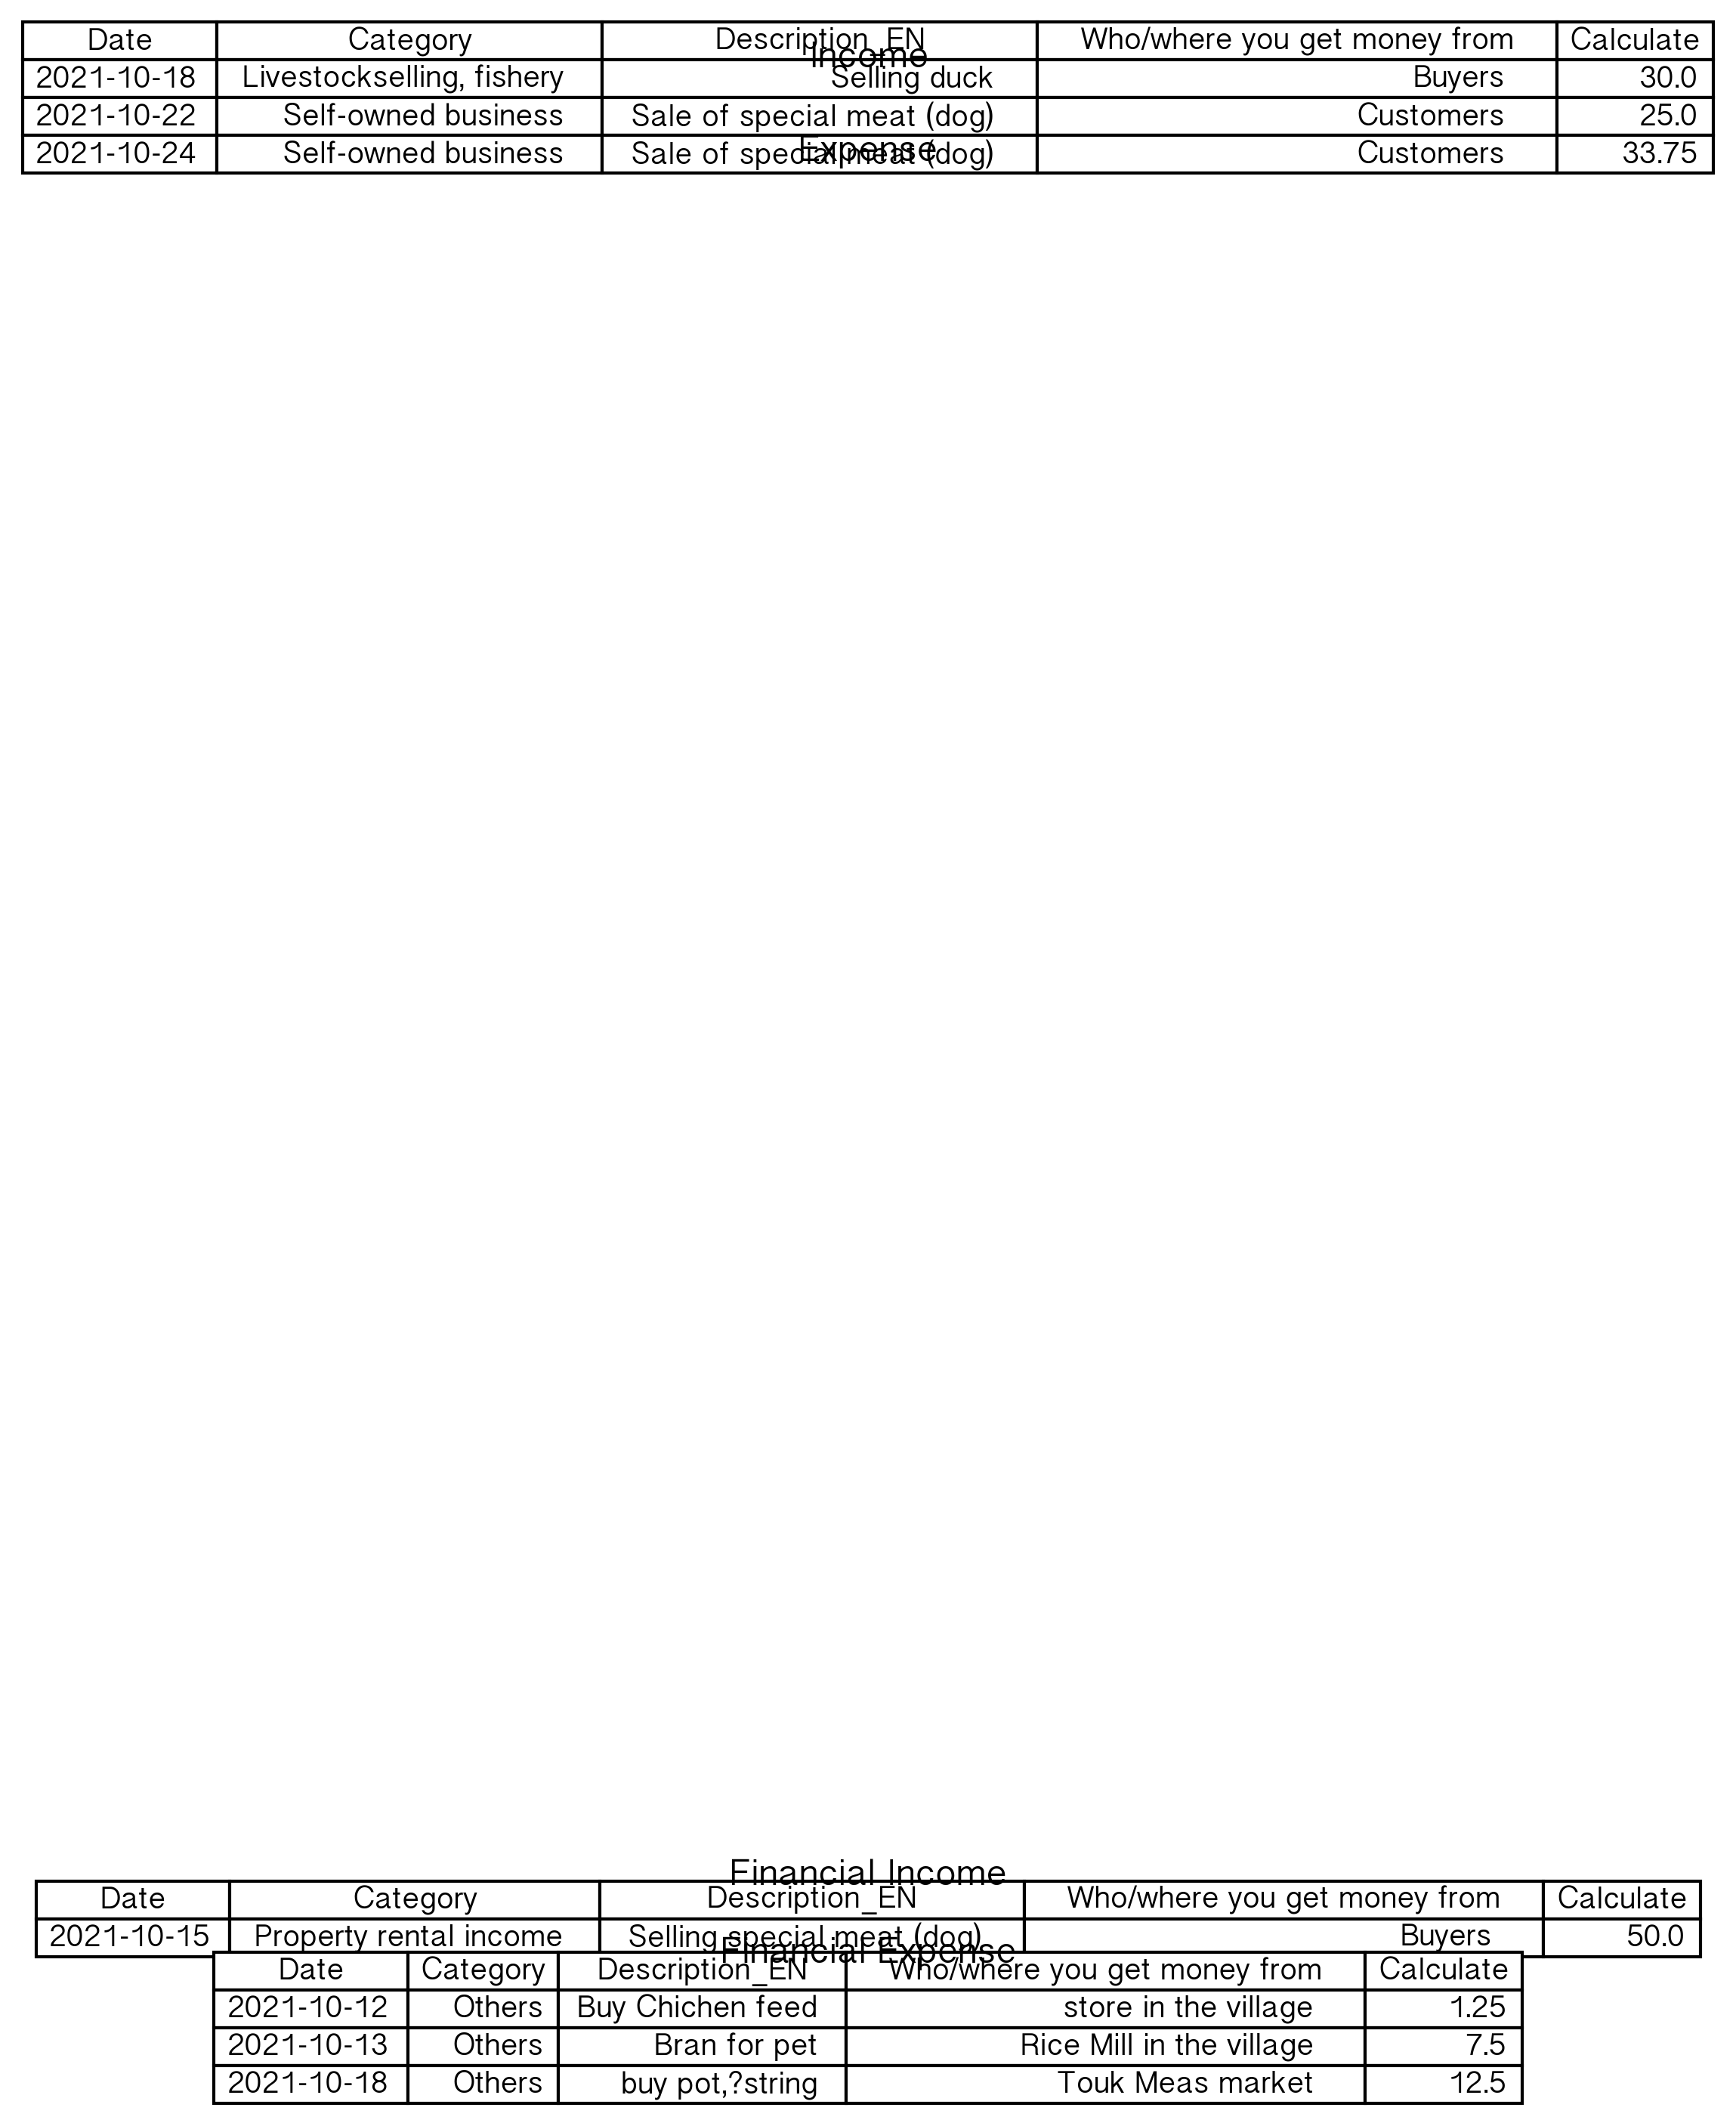

In [201]:
fig = plt.figure(dpi=300, tight_layout=True)
fig.set_size_inches(8.27, 11.69, forward=True)
Sum=len(In)+len(Out)+len(F_in)+len(F_out)
ax2 = np.zeros(4, dtype=object)
gs = fig.add_gridspec(4, 1, height_ratios=[len(In)/(Sum*2),len(Out)/Sum,len(F_in)/Sum,len(F_out)/Sum]
                      , hspace=0.1,wspace=0.2)
                      
                     
ax2[0] = fig.add_subplot(gs[0])
ax2[1] = fig.add_subplot(gs[1])
ax2[2] = fig.add_subplot(gs[2])
ax2[3] = fig.add_subplot(gs[3])
tab0=ax2[0].table(cellText=In.values,colLabels=In.columns,loc='center')
tab1=ax2[1].table(cellText=Out.values,colLabels=In.columns,loc='center')
tab2=ax2[2].table(cellText=F_in.values,colLabels=In.columns,loc='center')
tab3=ax2[3].table(cellText=F_out.values,colLabels=In.columns,loc='center')
tab0.auto_set_column_width(col=list(range(len(In.columns))))
tab1.auto_set_column_width(col=list(range(len(Out.columns))))
tab2.auto_set_column_width(col=list(range(len(F_in.columns))))
tab3.auto_set_column_width(col=list(range(len(F_out.columns))))
ax2[0].set_title("Income",pad=0.1)
ax2[1].set_title("Expense",pad=0.1)
ax2[2].set_title("Financial Income")
ax2[3].set_title("Financial Expense")

ax2[0].axis('off')
ax2[1].axis('off')
ax2[2].axis('off')
ax2[3].axis('off')





In [170]:
len(In)/(Sum)

0.04918032786885246

In [121]:
In=In.reindex(columns=['FINANCIAL_DATE','CODE_K','Description_EN','RDInstitution_EN','Calculate'])

In [122]:
In.rename(columns={"FINANCIAL_DATE":"Date","RDInstitution_EN":"Who/where you get money from","CODE_K":"Category"})

,Date,Category,Description_EN,Who/where you get money from,Calculate
8232,2021-10-12,Self-owned business,Selling chickens,Buyers,12.5
8233,2021-10-12,Casual employment,My son provides transportion of soil to sell,My grandmother,2.5
8239,2021-10-13,Regular wage,Monthly wage of my husband,My 7B factory,100.0
8281,2021-10-23,"Livestockselling, fishery",Sale of chicken,"Customers at the market, Thnal Totoeung",12.5
8290,2021-10-24,"Livestockselling, fishery",Sale of chicken,"Customers at the market, Thnal Totoeung",27.5
8294,2021-10-25,Regular wage,Salary of chidren,"Employer of the factory, Keo Uddom",100.0


In [ ]:
"""This code is for when you use loop and generate the reports for everybody"""

"""Aggregate by the category"""
"""1.Extract the data by ID. 2. Specify the data point: Start and End"""
"""1. Sorty by E/R. 2. Sort by Income&Expense/Financial. 3. Sort by Code."""
#1
ID_list=df['Diarist_ID'].drop_duplicates(keep='first').to_list()
ID= input(int('Input the ID'))
for ID in ID_list:
    df_ID=df.drop(df[(df.Diarist_ID!= ID)].index)
#2
Start_day=pd.to_datetime(input('When is the start day? year-month-day'))
End_day=pd.to_datetime(input('When is the end day? year-month-day'))
mask=(df_ID['FINANCIAL_DATE']>=Start_day)& (df_ID['FINANCIAL_DATE']<=End_day)
df_IDay = df_ID.loc[mask]

In [148]:
df_IDay

,Diarist_ID,TypeER,BranchName,BranchID,Province,District,Commune,Village,VID,Sample_Type1,Sample_Type2,L_number,L_Status,Impact,ENUMERATOR_CODE,ENUMERATOR_NAME,RESPONDENT_CODE,RESPONDENT_NAME,INTERVIEW_DATE,FINANCIAL_DATE,INTERVIEW_METHOD,TOTAL,ID,Description_EN,AMOUNT,CURRENCY,RDInstitution_EN,CODE,description,Calculate,BUSINESS_INFO_EN,HEALHT_INFO_EN,EDUCATION_INFO_EN,OTHER_INFO_EN,DATA_COLLECTOR_NOTE_EN,ER_CODE,CODE_K


In [456]:
df['Diarist_ID'].unique()

array([  5,   6,   7,   9,  13,  16,  17,  18,  19,  23,  27,  31,  32,
        33,  40,  41,  46,  47,  50,  54,  57,  62,  64,  71,  72,  76,
        77,  79,  80,  81,  83,  92, 105, 108, 113, 115, 119, 120, 121,
       122, 131, 136, 137, 138, 142, 145, 149, 167, 170, 177, 180, 186,
       196, 198, 216, 218, 221, 223, 226, 231, 232, 235, 236, 243, 244,
       245, 251, 254, 262, 266, 269, 272, 276, 278, 283, 294, 300, 303,
       305, 307, 309, 319, 321, 324, 326, 330, 331, 337, 339, 340, 361,
       364, 373, 375, 377, 378, 381, 383, 384, 392, 396, 401, 402, 403,
       406, 407, 408, 416, 425, 426, 428, 429, 431, 434, 436, 446, 447,
       451, 456, 457, 460, 461, 464, 465, 473, 474, 476, 478, 480])

In [334]:
#Knowing what font is in matplotlib
import matplotlib
 
fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])
print(fonts)

#Axis Adjustment-Absolute
Calculate_sum=max(In['Calculate'].sum(),Out['Calculate'].sum(),F_in['Calculate'].sum(),F_out['Calculate'].sum())
base=20*round(Calculate_sum/20)+10
graduations=[]
for y in range(1,int(base/20)+1):
    graduations.append(20*y)
    


{'Andale Mono', 'Khmer Sangam MN', 'Noto Sans Hatran', 'Estrangelo Nisibin', 'Tamil MN', 'DejaVu Sans Mono', 'Kannada Sangam MN', 'Apple SD Gothic Neo', 'Bodoni 72 Smallcaps', 'Malayalam MN', 'Kohinoor Gujarati', 'Noto Sans Miao', 'Oriya Sangam MN', 'Noto Sans Armenian', 'Gujarati MT', 'Noto Sans Coptic', 'Bitstream Vera Serif', 'Noto Sans Javanese', 'Kailasa', 'Mshtakan', 'Hiragino Sans', 'SignPainter', 'Noto Sans Lycian', 'Noto Sans Mandaic', '.Keyboard', 'STIXIntegralsUpD', 'Noto Sans Tifinagh', 'Noto Sans Khudawadi', 'Luminari', 'Noto Sans Glagolitic', 'Bitstream Vera Sans Mono', 'Noto Sans Meetei Mayek', 'Noto Sans Kharoshthi', 'Noto Sans Mahajani', 'Noto Sans Ugaritic', 'cmr10', 'Noto Sans PhagsPa', 'Shree Devanagari 714', 'Gujarati Sangam MN', 'Diwan Kufi', 'Arial Unicode MS', 'Kokonor', 'Chalkboard', 'Rockwell', 'Arial Hebrew', 'Estrangelo Talada', 'Devanagari Sangam MN', 'Charter', 'Noto Sans Old North Arabian', 'Sinhala Sangam MN', 'Noto Sans Cuneiform', 'Noto Sans Avestan', 

In [960]:
font_manager.findfont("Suwannaphum") 

'/Users/inouenoritake/opt/miniconda3/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

Text(2.5, 2, 'អាហារuសេវាអ៊ីនធឺណិតពិធីផ្សេងទៀត។あいう')

findfont: Font family ['Suwannaphum.ttf'] not found. Falling back to DejaVu Sans.


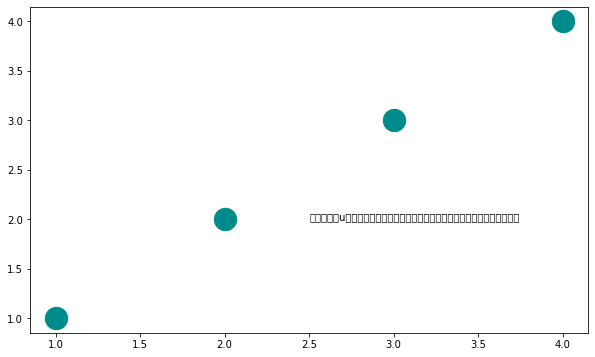

In [959]:
from pathlib import Path
import matplotlib as mpl
plt.figure(figsize=(10, 6))
plt.scatter([1, 2, 3, 4], [1, 2, 3, 4], s=500, color="darkcyan")
#fpath = Path(mpl.get_data_path(), "/fonts/ttf/Suwannaphum.ttf")
plt.text(2.5, 2, "អាហារuសេវាអ៊ីនធឺណិតពិធីផ្សេងទៀត។あいう", fontname="Suwannaphum.ttf")